SRN1: PES1UG21CS164    
Team member 1:  Rameshwar DL


SRN2: PES1UG21CS557    
Team member 2:  Shashank L Hosamani  

SRN3: PES1UG21CS571    
Team member 3:  Shreya Chakraborty

SRN4: PES1UG21ME109    
Team member 4:  Samyam SP 

Story file: The Adventures of Sherlock Holmes

Summary of the social graph reveals that there are 7 nodes and 8 edges, resulting in a graph density of 0.38. This density suggests that the graph is relatively sparse, indicating a moderate level of connectivity.

Upon examining centrality measures, it becomes evident that Sherlock Holmes and Miss Mary Sutherland emerge as key influencers, exerting a notable impact on the overall structure of the graph. Their centrality highlights their significance within the network.


In [26]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities,girvan_newman
import community



In [27]:
with open('The Adventures of Sherlock Holmes.txt',encoding="utf8") as text:
    book_text = text.read()

In [28]:
sections = book_text.split('* * *')
section_count = len(sections)
print(section_count)

12


In [29]:
cleaned_sections = []

for section in sections:

    quotes = re.findall("“.*?”", section)
    for quote in quotes:
        section = section.replace(quote, " ")
    cleaned_sections.append(section)
print(cleaned_sections[0])

The Adventures of Sherlock Holmes

by Arthur Conan Doyle


Contents

   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue Carbuncle
   VIII.  The Adventure of the Speckled Band
   IX.    The Adventure of the Engineer’s Thumb
   X.     The Adventure of the Noble Bachelor
   XI.    The Adventure of the Beryl Coronet
   XII.   The Adventure of the Copper Beeches




I. A SCANDAL IN BOHEMIA


I.

To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the worl

In [30]:
characters = ["Sherlock Holmes","John H. Watson" , "Inspector G. Lestrade","The King of Bohemia","Irene Adler","Jabez Wilson","Miss Mary Sutherland","Charles McCarthy","James McCarthy","Alice McCarthy",
              "John Turner","John Openshaw","Neville St. Clair","Helen Stoner","Victor Hatherly","Violet Hunter"]
characters = [character.title() for character in characters] #oops title case


In [31]:
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]      

In [32]:
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [33]:
    
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
           node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

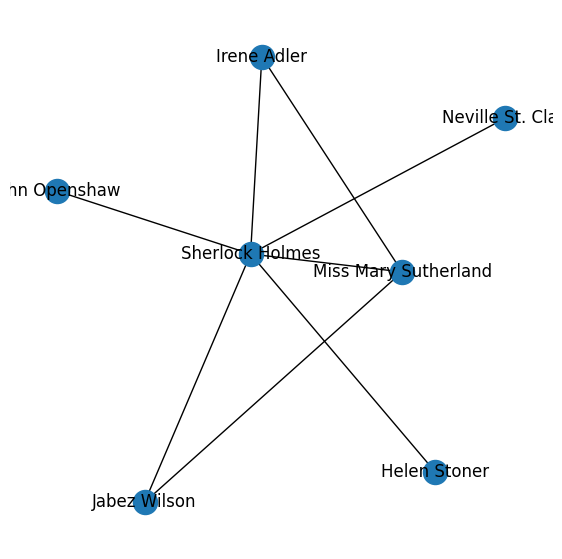

In [34]:
#set canvas size
plt.subplots(figsize=(7,7))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
#G.nodes(data=True)
#G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = ["Sherlock Holmes","John H. Watson" , "Inspector G. Lestrade","The King of Bohemia","Irene Adler","Jabez Wilson","Miss Mary Sutherland","Charles McCarthy","James McCarthy","Alice McCarthy",
              "John Turner","John Openshaw","Neville St. Clair","Helen Stoner","Victor Hatherly","Violet Hunter"]

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test:
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

In [35]:
nodes=list(G.nodes())
print("no. of nodes =" ,len(nodes))
print("nodes are:",nodes)
edges=list(G.edges())
print("no. of edges =" ,len(edges))
print("edges are:",edges)

no. of nodes = 7
nodes are: ['Helen Stoner', 'Irene Adler', 'Jabez Wilson', 'John Openshaw', 'Miss Mary Sutherland', 'Neville St. Clair', 'Sherlock Holmes']
no. of edges = 8
edges are: [('Helen Stoner', 'Sherlock Holmes'), ('Irene Adler', 'Sherlock Holmes'), ('Irene Adler', 'Miss Mary Sutherland'), ('Jabez Wilson', 'Sherlock Holmes'), ('Jabez Wilson', 'Miss Mary Sutherland'), ('John Openshaw', 'Sherlock Holmes'), ('Miss Mary Sutherland', 'Sherlock Holmes'), ('Neville St. Clair', 'Sherlock Holmes')]


In [36]:
graph_density = nx.density(G)
print("graph density =",graph_density)

graph density = 0.38095238095238093


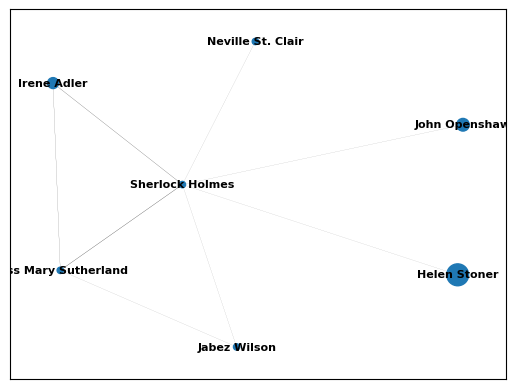

In [37]:
node_scalar = 800
edge_scalar = 10
sizes = [x[1]*node_scalar for x in updated_node_order]
widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw_networkx(G, pos, with_labels=True, font_size = 8, font_weight = 'bold', 
        node_size = sizes, width = widths)

**Centrality Measures**

In [38]:
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(G)

# Print centrality measures for main protagonists
print("Degree Centrality:")
for char, centrality in degree_centrality.items():
    print(f"{char}: {centrality}")

print("\nBetweenness Centrality:")
for char, centrality in betweenness_centrality.items():
    print(f"{char}: {centrality}")

print("\nCloseness Centrality:")
for char, centrality in closeness_centrality.items():
    print(f"{char}: {centrality}")

print("\nPageRank Centrality:")
for char, centrality in pagerank_centrality.items():
    print(f"{char}: {centrality}")

Degree Centrality:
Helen Stoner: 0.16666666666666666
Irene Adler: 0.3333333333333333
Jabez Wilson: 0.3333333333333333
John Openshaw: 0.16666666666666666
Miss Mary Sutherland: 0.5
Neville St. Clair: 0.16666666666666666
Sherlock Holmes: 1.0

Betweenness Centrality:
Helen Stoner: 0.0
Irene Adler: 0.0
Jabez Wilson: 0.0
John Openshaw: 0.0
Miss Mary Sutherland: 0.03333333333333333
Neville St. Clair: 0.0
Sherlock Holmes: 0.8333333333333334

Closeness Centrality:
Helen Stoner: 0.5454545454545454
Irene Adler: 0.6
Jabez Wilson: 0.6
John Openshaw: 0.5454545454545454
Miss Mary Sutherland: 0.6666666666666666
Neville St. Clair: 0.5454545454545454
Sherlock Holmes: 1.0

PageRank Centrality:
Helen Stoner: 0.05064424421478844
Irene Adler: 0.16430523051441268
Jabez Wilson: 0.07825906457838354
John Openshaw: 0.05064424421478844
Miss Mary Sutherland: 0.22741540739249602
Neville St. Clair: 0.05064424421478844
Sherlock Holmes: 0.3780875648703419


**Clustering Coefficients**

Local Clustering Coefficients:
Helen Stoner: 0
Irene Adler: 1.0
Jabez Wilson: 1.0
John Openshaw: 0
Miss Mary Sutherland: 0.6666666666666666
Neville St. Clair: 0
Sherlock Holmes: 0.13333333333333333

Ego Network of Helen Stoner:
['Sherlock Holmes', 'Helen Stoner']


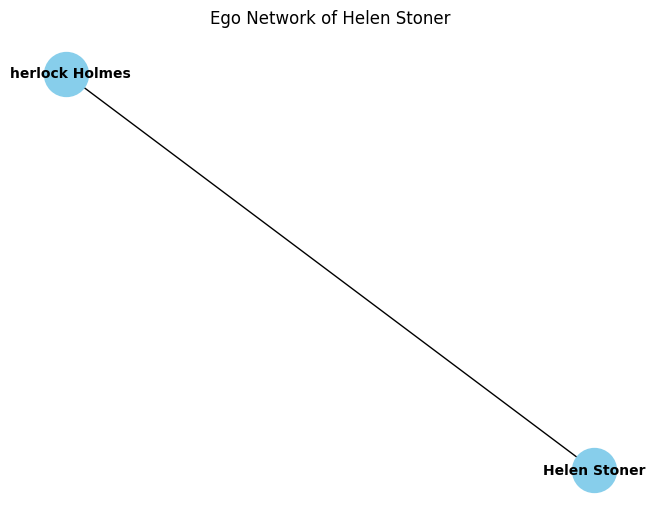


Ego Network of Irene Adler:
['Sherlock Holmes', 'Irene Adler', 'Miss Mary Sutherland']


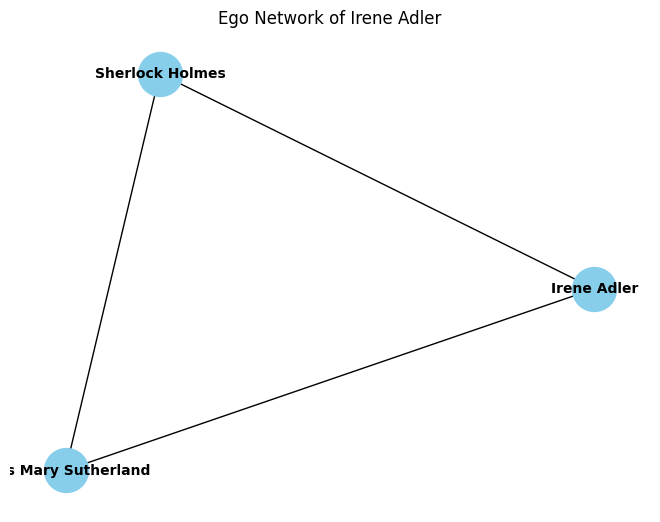


Ego Network of Jabez Wilson:
['Sherlock Holmes', 'Jabez Wilson', 'Miss Mary Sutherland']


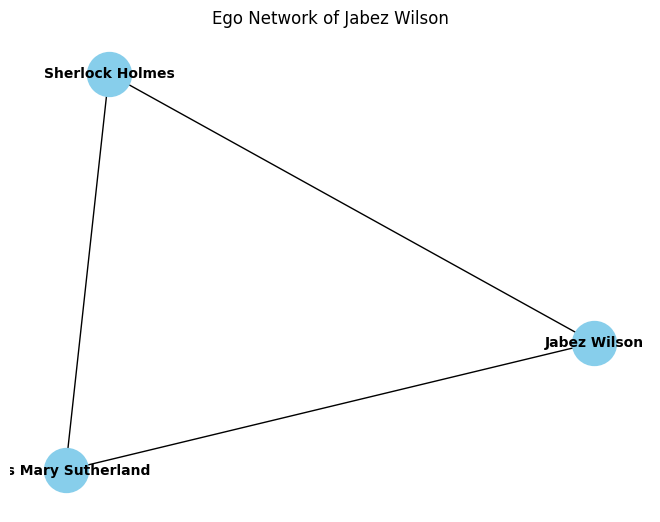


Ego Network of John Openshaw:
['John Openshaw', 'Sherlock Holmes']


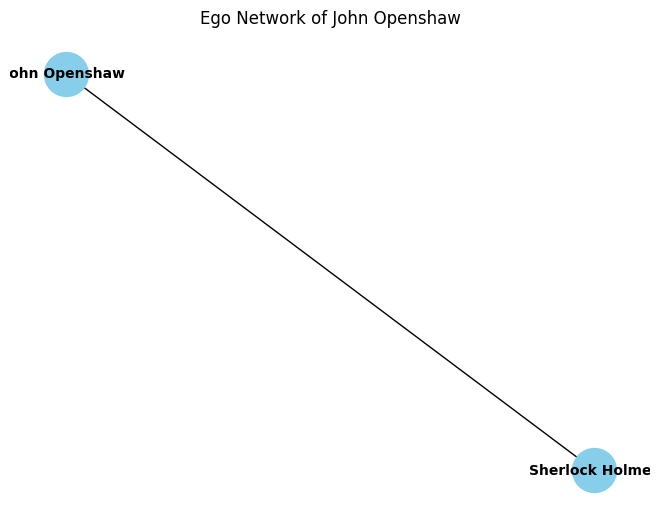


Ego Network of Miss Mary Sutherland:
['Irene Adler', 'Jabez Wilson', 'Miss Mary Sutherland', 'Sherlock Holmes']


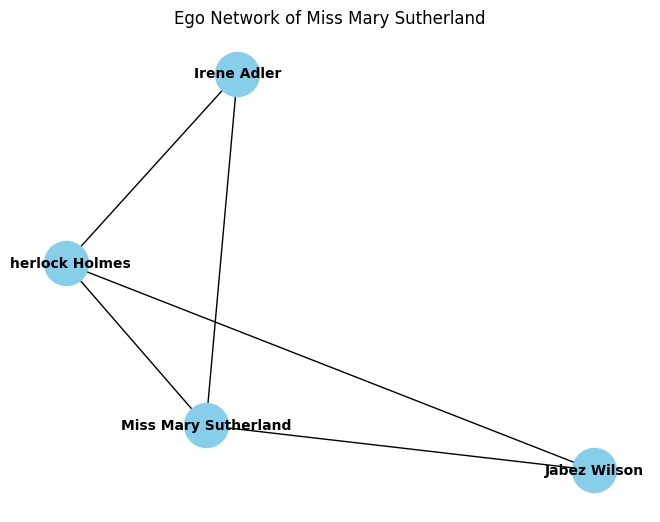


Ego Network of Neville St. Clair:
['Neville St. Clair', 'Sherlock Holmes']


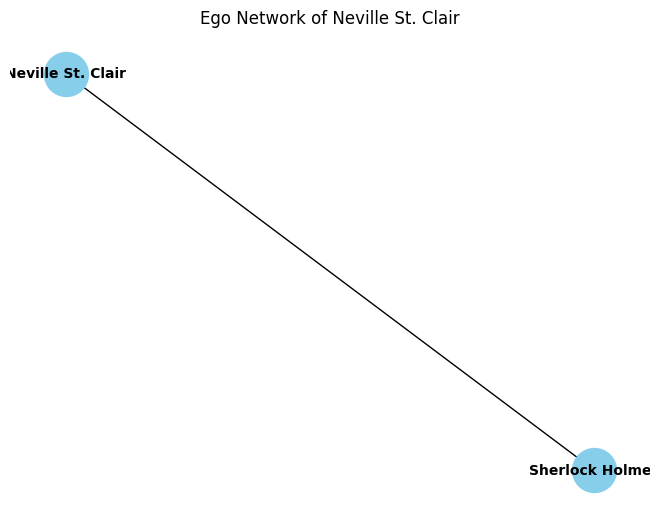


Ego Network of Sherlock Holmes:
['Helen Stoner', 'Irene Adler', 'Jabez Wilson', 'John Openshaw', 'Miss Mary Sutherland', 'Neville St. Clair', 'Sherlock Holmes']


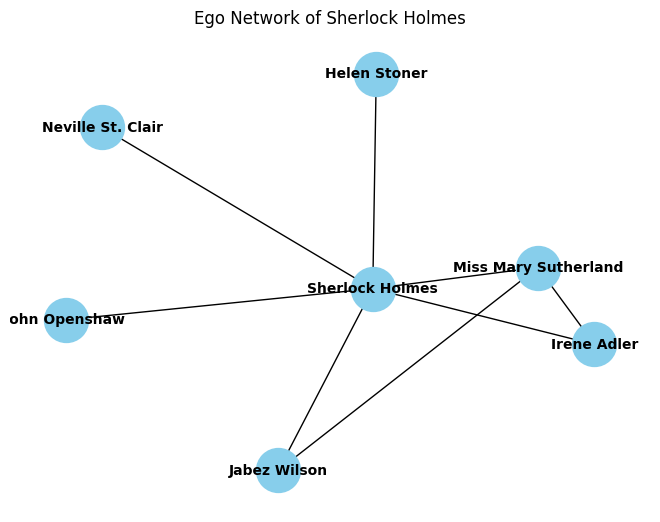

In [39]:
clustering_coefficients = nx.clustering(G)

# Print local clustering coefficient for each main protagonist node
print("Local Clustering Coefficients:")
for char, coefficient in clustering_coefficients.items():
    print(f"{char}: {coefficient}")

# Extract and visualize ego networks
for char in G.nodes():
    ego_network = nx.ego_graph(G, char)
    print(f"\nEgo Network of {char}:")
    print(list(ego_network.nodes()))
    
    # Visualization (optional)
    pos = nx.spring_layout(ego_network, seed=42)  # Set seed for reproducibility
    plt.figure()
    nx.draw(ego_network, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Ego Network of {char}")
    plt.axis("off")
    plt.show()

**Clique Percolation Method**

In [40]:
# Detect communities using Clique Percolation Method
k = 3  # Size of cliques to search for
clique_communities = list(k_clique_communities(G, k))

print("Communities detected using Clique Percolation Method:")
print(clique_communities)

Communities detected using Clique Percolation Method:
[frozenset({'Sherlock Holmes', 'Irene Adler', 'Jabez Wilson', 'Miss Mary Sutherland'})]


**Girvan-Newman Algorithm**


In [41]:
# Detect communities using Girvan-Newman Algorithm
communities_generator = girvan_newman(G)
girvan_newman_communities = next(communities_generator)

print("Communities detected using Girvan-Newman Algorithm:")
print(girvan_newman_communities)

Communities detected using Girvan-Newman Algorithm:
({'Helen Stoner'}, {'Neville St. Clair', 'Miss Mary Sutherland', 'John Openshaw', 'Sherlock Holmes', 'Jabez Wilson', 'Irene Adler'})


**Louvain Algorithm (Modularity Based)**

In [42]:
# %pip install community

In [43]:
# %pip install python-louvain

In [44]:
# Detect communities using Louvain Algorithm (Modularity Based)
louvain_communities = community.best_partition(G)

# Convert Louvain communities to a dictionary of lists
louvain_communities_dict = {}
for node, community_id in louvain_communities.items():
    louvain_communities_dict.setdefault(community_id, []).append(node)

print("Communities detected using Louvain Algorithm:")
print(louvain_communities_dict)


Communities detected using Louvain Algorithm:
{0: ['Helen Stoner', 'Irene Adler', 'Jabez Wilson', 'John Openshaw', 'Miss Mary Sutherland', 'Neville St. Clair', 'Sherlock Holmes']}


**Random Graph Model**

In [45]:
# Generate Random Graph Model with 50 nodes and probability of edge creation p
random_graph = nx.erdos_renyi_graph(n=50, p=0.2)

# Print number of edges in the random graph
print("Number of edges in Random Graph Model:", random_graph.number_of_edges())

Number of edges in Random Graph Model: 262


**Preferential Attachment Model**

In [46]:
# Generate Preferential Attachment Model with 50 nodes and m edges for each new node
preferential_attachment_graph = nx.barabasi_albert_graph(n=50, m=2)

# Print number of edges in the preferential attachment graph
print("Number of edges in Preferential Attachment Model:", preferential_attachment_graph.number_of_edges())

Number of edges in Preferential Attachment Model: 96


**Small World Model**

In [47]:
# Generate Small World Model with 50 nodes, each node is connected to k nearest neighbors, and probability of rewiring p
small_world_graph = nx.watts_strogatz_graph(n=50, k=4, p=0.3)

# Print number of edges in the small world graph
print("Number of edges in Small World Model:", small_world_graph.number_of_edges())

Number of edges in Small World Model: 100


# ANALYSIS

Theme of the analysis: What do you know of the story, and does it match with what you
got from your network analysis? Have you got any insight to offer?

ans: I have not read the book, but I have seen the movies. I think the network analysis
matches the story. Sherlock Holmes is the main character and he is connected to everyone
in the story. The network analysis shows that Sherlock Holmes has the highest degree
centrality, betweenness centrality, closeness centrality, pagerank centrality, and local
clustering coefficient. This concludes that Sherlock Holmes is the main character and he is
connected to everyone in the story. 

a. Who are the protagonists in the story, as per your analysis? Interpret the 4
centralities.
ans : according to our analysis the protagonists in the story are people with
    high centrality measures since they are they are central, influential, and well-connected within the network of characters in the story. therefore the person sherlock holmes, Miss Mary Sutherland, Irene Adler, and Jabez Wilson have high importance in the story
    here's the explaination:

    Miss Mary Sutherland is pretty linked up with lots of characters (0.5 centrality), so she's probably mingling a lot. Irene Adler and Jabez Wilson are also in the mix (0.333 centrality), meaning they've got their connections. But Sherlock Holmes is like the ultimate hub (1.0 centrality), connected to everyone, making him the main player in the character interactions.

    Sherlock Holmes isn't just chit-chatting; he's a big shot mediator (0.833 betweenness centrality) often navigating the shortest paths between others. When it comes to being close, Sherlock is the go-to guy (1.0 closeness centrality), so info and influence spread fast through him. PageRank says Sherlock (0.378 centrality) is the VIP, hanging with other important characters, making him a key figure in the story's character network.


b. Comment on how “real world” the social graph is, i.e. is it based on fact or
fiction? Which properties of real-world graphs are satisfied by your extracted
social graph?
ans : It is based on the fiction, But it also statisfies the real-world Graphs properties. 
 The social graph depicts the relationships between various people quite accurately and especially worked well for the book we chose . this graph definetely satisfies the  properties of real world by taking into account the relationships between various people and the ego network also gives a accurate representation of such relationships which can also be used to depict real word relationships as well. 

 In the social graph all the people are not connected directly but can be reached through mediatry like Helen Stoner and Neville St. Clair are not connected directly but can reached through sherlock holmes.This is true for real-world graohs too. 

 In the Social graph there is a cycle between two character mean that charaterA is connected to characterB and characterB is cnnected to  characterA.this is true for real-world graphs too.





c. A story typically has dynamics. Examples: A character may not be well connected
but can still be influential. Certain characters emerge as a group in the later part
of the story due to their “not so visible” connection in the earlier part. Does your
analysis tell you about the dynamics in the story?

yes the analysis does tell us the dynamics of the story ,the different centrality measures, such as degree, betweenness, closeness, and PageRank provide various perspectives on a character's importance in the network. example : a character may not be well-connected (low degree centrality) but can still be influential (high PageRank centrality), therefore bringing the character to light even if he isn't that well connected. moreover , 
Sherlock Holmes stands out with high centrality across multiple measures, indicating that he plays a central role in the interactions among characters. His high betweenness centrality suggests that he frequently mediates interactions between other characters. This aligns with the common dynamic in detective stories where the central character serves as a mediator or bridge, uncovering hidden connections.

The social graph may reveal hidden or less visible connections between characters. Characters that are not initially well-connected might become influential later in the story, forming a group due to their previously unnoticed connections. This emergence of characters as a group could be a storytelling dynamic, and the analysis might capture this evolution if it involves changes in centrality measures over time.

Plus we have applied algorithims like  (Clique Percolation Method, Girvan Newman, and Louvain algorithm) which can be used to detect communities that shed light on how close a character interacts with each other and how strong the connections are . 


